<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/CNN/16_create_model_3ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류 - 완전연결층
---
fully connected layer 구현

tensorflow - dense layer

- Fashion Mnist 데이터셋

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 시각화 

samples = np.random.randint(60000, size=9)
samples

array([33336, 38877, 57348, 16556, 53238, 17929, 16247, 51127, 38148])

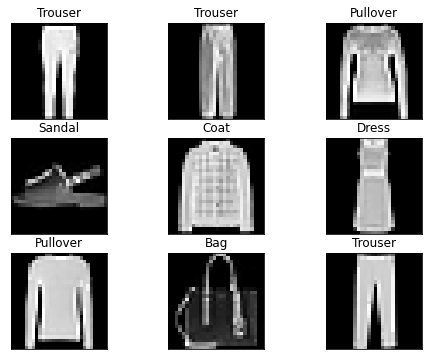

In [5]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])

plt.show()

## 검증용 데이터 (Validation Data)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [7]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)
#데이터가 충분히 많을 때는 검증용 데이터도 나눠서 사용하는 게 좋음 

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


##정규화
- min-Max 정규화

In [8]:
X_train = X_train/255
#255로 안나눠도 됨
X_val = X_val/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(42000, 784)

In [10]:
# Y 값 one-hot 인코딩 (다중 분류)
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

## 모델 생성

In [11]:
#X를 1차원으로 변경해야 모델에 넣을 수 있음
X_train = X_train.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(42000, 784)

In [12]:
# add convolution layer
# CNN에 넣기 위해서 X의 형태 변경하기
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
#Sequential 생ㄷ성할 때, 레이어를 동시에 지정
def build_model_1():
  model = keras.Sequential([
      layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)),
      layers.MaxPool2D(pool_size=(2,2)),
      layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
      layers.MaxPool2D(pool_size=(2, 2)),

      #Dense를 넣기 전에 flatten 해주기
      layers.Flatten(),

      layers.Dense(units=32, activation='relu'),

      #이진 분류 모델: sigmoid 출력층 - 0 or 1
      # 다중 분류: softmax
      layers.Dense(units = 10, activation='softmax'),
  ])

      
  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics=["acc"]
  )
  
  return model

model = build_model_1()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

## 학습

In [15]:
epochs = 30
batch_size = 32

history = model.fit(X_train, y_train_oh, epochs=epochs,
                    batch_size = batch_size, validation_data=(X_val, y_val_oh), verbose=1)

Epoch 1/30
1313/1313 [==============================] - 16s 5ms/step - loss: 0.5848 - acc: 0.7883 - val_loss: 0.4040 - val_acc: 0.8543
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3875 - acc: 0.8629 - val_loss: 0.3573 - val_acc: 0.8696
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3412 - acc: 0.8780 - val_loss: 0.3170 - val_acc: 0.8853
Epoch 4/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3113 - acc: 0.8874 - val_loss: 0.2895 - val_acc: 0.8961
Epoch 5/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2892 - acc: 0.8950 - val_loss: 0.2795 - val_acc: 0.9001
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2681 - acc: 0.9016 - val_loss: 0.2842 - val_acc: 0.8969
Epoch 7/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2524 - acc: 0.9071 - val_loss: 0.2647 - val_acc: 0.9034
Epoch 8/30
1313/1313 [==============================] - 9s 7

## 평가

In [16]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0771 - acc: 0.9714


[0.07711785286664963, 0.9713809490203857]

In [17]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 5ms/step - loss: 0.4335 - acc: 0.8951


[0.4335086941719055, 0.8950999975204468]

## 예측

In [18]:
y_pred = model.predict(X_test)

y_pred

313/313 [==============================] - 1s 2ms/step


array([[8.42291352e-13, 2.61101532e-16, 1.43355532e-14, ...,
        1.34327207e-08, 1.29035732e-11, 1.00000000e+00],
       [2.99005769e-05, 4.85914613e-14, 9.99552071e-01, ...,
        1.43371645e-22, 6.91701610e-16, 1.07294284e-17],
       [1.06669874e-13, 1.00000000e+00, 4.42525817e-13, ...,
        8.25720369e-26, 1.72335484e-16, 6.54189538e-23],
       ...,
       [1.32567582e-13, 1.08029090e-19, 3.58456108e-19, ...,
        2.00154377e-14, 1.00000000e+00, 3.80430103e-22],
       [7.92280824e-12, 1.00000000e+00, 9.00466157e-15, ...,
        5.74654004e-19, 8.71552049e-12, 2.11348679e-18],
       [3.90004623e-03, 1.56123978e-14, 7.78715548e-05, ...,
        3.86217684e-01, 1.43949862e-03, 6.04195287e-04]], dtype=float32)

In [19]:
#One-hot 전으로 되돌리기 (정답값의 형태로)
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
  cfm = confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))
  sns.heatmap(cfm, annot=True, cbar=False, fmt="d")
  plt.xlabel("Predicted Class")
  plt.ylabel("True Class")
  plt.show()

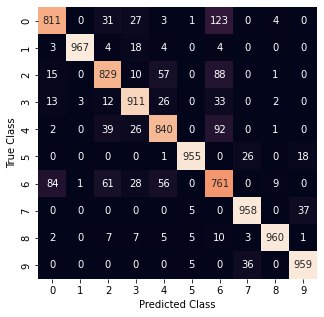

In [21]:
plot_confusion_matrix(y_test, y_pred)


## 오답 이미지 출력

In [22]:
#오답 이미지 출력
samples = np.where((y_test == y_pred) == False)[0]
samples

array([   7,   12,   17, ..., 9972, 9985, 9991])

In [23]:
samples = np.random.choice(samples, 9)
samples

array([ 444, 9537, 8764, 9475, 1739, 7393, 4850,  905, 9662])

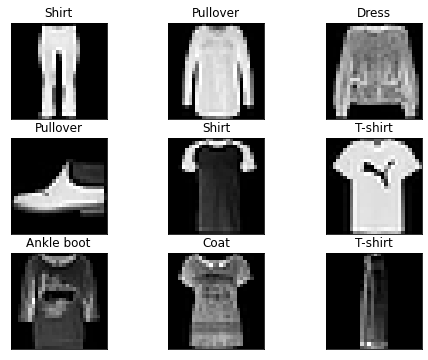

In [24]:
#시각화

plt.figure(figsize=(8,6))

for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  plt.title(class_name[y_test[idx]])

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

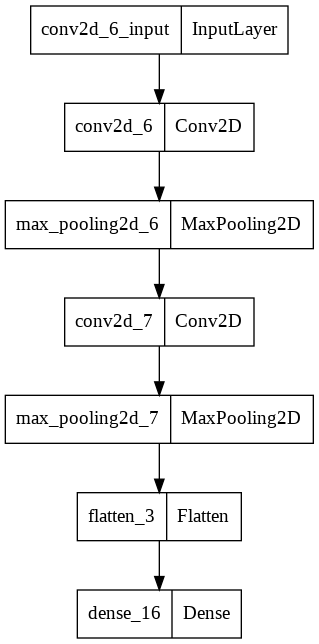

In [34]:
#Sequential 생성 후 추가 - 조건에 따라 레이어 넣거나 하기에 좋음
def build_model_2():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  # model.add(layers.Flatten()
  model.add(layers.Dense(units = 10, activation='softmax'))
      
  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics=["acc"]
  )
  
  return model

model2 = build_model_2()

model2.summary()
tf.keras.utils.plot_model(model2)


## 2. 함수형 API 사용
- Sequential로 만들 수 없는 모델을 만들 경우 사용

In [35]:
from tensorflow.keras.models import Model
#기존에 만들었던 레이어가 다음 레이어의 인풋으로 들어감 (함수 형태로)

def build_model_3():
  inputs = layers.Input(shape=(28,28,1))
  x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
  x = layers.MaxPool2D(pool_size=(2,2))(x)
  x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
  x = layers.MaxPool2D(pool_size=(2, 2))(x)
  x = layers.Flatten()(x)
  x =layers.Dense(units=32, activation='relu')(x)
  outputs = layers.Dense(units = 10, activation='softmax')(x)

  model = Model(inputs =inputs, outputs = outputs)

  model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["acc"]
  )
  
  return model


model = build_model_3()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0   

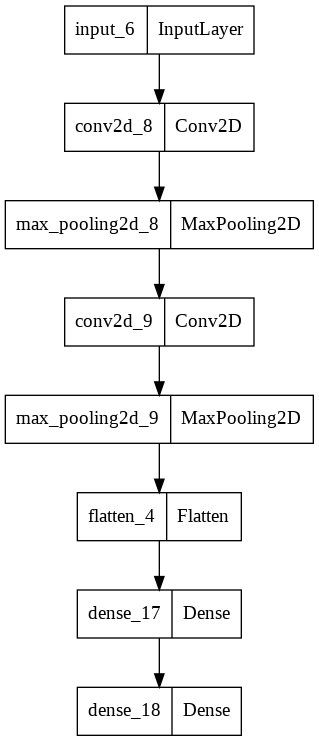

In [36]:
tf.keras.utils.plot_model(model)

In [31]:
# 입력이 두 개

inputX = layers.Input(shape = (16,))
x1= layers.Dense(8, activation='relu')(inputX)
x2 = layers.Dense(16, activation='relu')(x1)
x3 = Model(inputs = inputX,outputs=x2)
#레이어가 하나로 합쳐진(뭉쳐진) 후 굴러감

inputY = layers.Input(shape = (16,))
x4= layers.Dense(8, activation='relu')(inputY)
x5 = layers.Dense(16, activation='relu')(x4)
x6 = Model(inputs = inputY, outputs=x5)

combined = layers.concatenate([x3.output, x6.output])
z1 = layers.Dense(2, activation='relu')(combined)
z2 = layers.Dense(1)(z1)


#위에서 만든 걸 하나로 결합
model = Model(inputs=[x3.input, x6.input], outputs=z2)


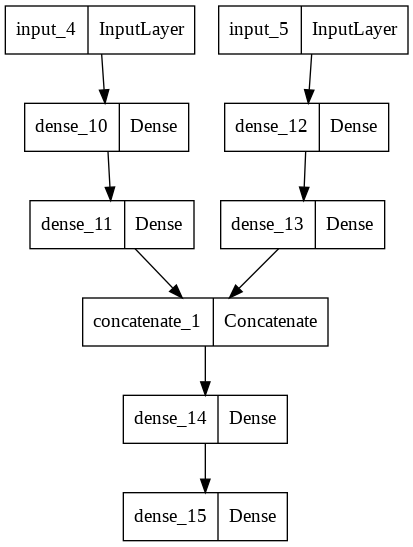

In [32]:
tf.keras.utils.plot_model(model)

입력이 두개인 경우에는 함수형으로 사용해야 함

## 3. 서브클래싱 (Subclassing)
- 모델을 클래스로 만드는 것

In [37]:
# 클래스 형
class MnistModel(Model):
  def __init__(self): #레이어 정의
    super(MnistModel, self).__init__()
    self.conv1 = layers.Conv2D(32, 3, activation='relu')
    self.conv2 = layers.Conv2D(64, 3, activation='relu')
    self.maxpool = layers.MAxPooling2D(2)
    self.flat = layers.Flatten()
    self.dense1 = layers.Dense(32, activation = 'relu')
    self.dense2 = layers.Dense(10, activation = 'softmax')

  def call(self, inputs): # 들어온 입력을 토대로 생성
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.flat(x)
    x = self.dense1(x)
    output = self.dense2(x)

    return output


In [ ]:
model = MnistModel()